In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

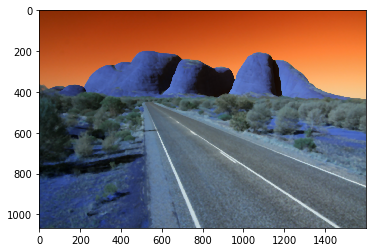

In [5]:
road=cv2.imread('DATA/PT20.jpg')
road=cv2.medianBlur(road,9)
road_copy=np.copy(road)

plt.imshow(road)


In [6]:
road.shape[:2]

(1066, 1600)

In [7]:
marker_image=np.zeros(road.shape[:2],dtype=np.int32)

In [8]:
segments=np.zeros(road.shape,dtype=np.uint8)

In [9]:
marker_image.shape

(1066, 1600)

In [10]:
from matplotlib import cm

In [11]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)


In [13]:
colors=[]
for i in range(10):
    colors.append(create_rgb(i))

In [14]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [15]:
current_marker=1
n_markers = 10
marks_updated=False

In [16]:
#callbk
def mouse_callback(event,x,y,flags,param):
    global marks_updated
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        marks_updated=True

In [17]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    cv2.imshow('WaterShed Segments',segments)
    cv2.imshow('Road Image',road_copy)
    
    k= cv2.waitKey(1)
    if k == 27:
        break
    #clear colors on press
    elif k == ord('c'):
        road_copy=road.copy()
        marker_image=np.zeros(road.shape[:2],dtype=np.int32)
        segments=np.zeros(road.shape,dtype=np.uint8)
    #update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    #update markings
    if marks_updated:
        marker_image_copy=marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        segments = np.zeros(road.shape,dtype=np.uint8)
        for color_ind  in range (n_markers):
            segments[marker_image_copy==(color_ind)]=colors[color_ind]
        
cv2.destroyAllWindows()   